In [27]:
import sklearn.datasets
import urllib.request
import os.path

import numpy as np
import matplotlib.pyplot as plt

from optimizer.loss import LogisticRegression
from optimizer.cubic import Cubic_LS, Cubic_Krylov_LS, SSCN
from optimizer.LBFGS import Lbfgs
from optimizer.GD import Gd, GD_LS
from optimizer.reg_newton import RegNewton

In [28]:
# dataset = 'rcv1_train.binary'
dataset = 'news20.binary'
    # if dataset == 'mushrooms':
    #     data_url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/mushrooms"
    #     data_path = './mushrooms'
    # else:
    #     data_url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/w8a"
    #     data_path = './w8a'
data_url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/{}".format(dataset)

if dataset in {'gisette_scale','duke','rcv1_train.binary','news20.binary'}: # or dataset == 'epsilon_normalized':
    data_path = './{}.bz2'.format(dataset)
else:
    data_path = './{}'.format(dataset)
if not os.path.exists(data_path):
    f = urllib.request.urlretrieve(data_url, data_path)
A, b = sklearn.datasets.load_svmlight_file(data_path)
# A = A.toarray()

A_csc = A.tocsc()

In [29]:
print(A.shape)

(19996, 1355191)


In [30]:
loss = LogisticRegression(A, b, l1=0, l2=0, store_mat_vec_prod=True)

loss_csc = LogisticRegression(A_csc, b, l1=0, l2=0, store_mat_vec_prod=True)
n, dim = A.shape
# L = loss.smoothness
# l2 = 1e-10 * L # make the problem ill-conditioned
# loss.l2 = l2
x0 = np.ones(dim) * 0.5

it_max = 50000
t_max = 60

In [31]:
# gd = GD_LS(loss=loss, label='GD LS')
memory_size = 10
cub_krylov = Cubic_Krylov_LS(loss=loss, reg_coef= 1e-3, label='Krylov Cubic Newton (m = {})'.format(memory_size),
                               subspace_dim=memory_size, tolerance = 1e-9)

cub_krylov_bench = Cubic_Krylov_LS(loss=loss, reg_coef= 1e-3, label='Krylov Cubic Newton (m = {})'.format(20),
                               subspace_dim=20, tolerance = 1e-9)

cub_root = Cubic_LS(loss=loss, reg_coef=1e-3, cubic_solver="CG", label='Cubic Newton', tolerance = 1e-8)

sscn = SSCN(loss=loss_csc, reg_coef = 1e-3, label='SSCN (m = {})'.format(memory_size),
                               subspace_dim=memory_size, tolerance = 1e-9)
# adan = RegNewton(loss=loss, adaptive=True, use_line_search=True, 
#                     label='AdaN')

In [32]:
loss_csc.A

<19996x1355191 sparse matrix of type '<class 'numpy.float64'>'
	with 9097916 stored elements in Compressed Sparse Column format>

In [33]:
print(f'Running optimizer: {cub_root.label}')
cub_root.run(x0=x0, it_max=it_max, t_max=t_max)
cub_root.compute_loss_of_iterates()



Running optimizer: Cubic Newton


  0%|          | 8/50000 [01:06<114:39:11,  8.26s/it]


In [34]:
t_max = cub_root.trace.ts[-1]

In [35]:
print(f'Running optimizer: {sscn.label}')
sscn.run(x0=x0, it_max=it_max, t_max=t_max)
sscn.compute_loss_of_iterates()

Running optimizer: SSCN (m = 10)


 10%|█         | 5218/50000 [01:06<09:27, 78.95it/s]


In [43]:
sscn50 = SSCN(loss=loss_csc, reg_coef = 1e-3, label='SSCN (m = {})'.format(50),
                               subspace_dim=50, tolerance = 1e-9)

sscn100 = SSCN(loss=loss_csc, reg_coef = 1e-3, label='SSCN (m = {})'.format(100),
                               subspace_dim=100, tolerance = 1e-9)

sscn500 = SSCN(loss=loss_csc, reg_coef = 1e-3, label='SSCN (m = {})'.format(500),
                               subspace_dim=500, tolerance = 1e-9)

print(f'Running optimizer: {sscn50.label}')
sscn50.run(x0=x0, it_max=it_max, t_max=t_max)
sscn50.compute_loss_of_iterates()

print(f'Running optimizer: {sscn100.label}')
sscn100.run(x0=x0, it_max=it_max, t_max=t_max)
sscn100.compute_loss_of_iterates()

print(f'Running optimizer: {sscn500.label}')
sscn500.run(x0=x0, it_max=it_max, t_max=t_max)
sscn500.compute_loss_of_iterates()

Running optimizer: SSCN (m = 50)


 13%|█▎        | 6427/50000 [01:06<07:27, 97.30it/s] 


Running optimizer: SSCN (m = 100)


 17%|█▋        | 8591/50000 [01:06<05:18, 130.06it/s]


Running optimizer: SSCN (m = 500)


 12%|█▏        | 6085/50000 [01:06<07:56, 92.12it/s] 


In [41]:
sscn1000 = SSCN(loss=loss_csc, reg_coef = 1e-3, label='SSCN (m = {})'.format(1000),
                               subspace_dim=1000, tolerance = 1e-9)

sscn5000 = SSCN(loss=loss_csc, reg_coef = 1e-3, label='SSCN (m = {})'.format(5000),
                               subspace_dim=5000, tolerance = 1e-9)

print(f'Running optimizer: {sscn1000.label}')
sscn1000.run(x0=x0, it_max=it_max, t_max=t_max)
sscn1000.compute_loss_of_iterates()

print(f'Running optimizer: {sscn5000.label}')
sscn5000.run(x0=x0, it_max=it_max, t_max=t_max)
sscn5000.compute_loss_of_iterates()

Running optimizer: SSCN (m = 1000)


  4%|▍         | 2032/50000 [01:06<25:59, 30.76it/s] 


Running optimizer: SSCN (m = 5000)


  0%|          | 2/50000 [01:12<501:32:14, 36.11s/it]


In [38]:
print(f'Running optimizer: {cub_krylov.label}')
cub_krylov.run(x0=x0, it_max=it_max, t_max=t_max)
cub_krylov.compute_loss_of_iterates()

print(f'Running optimizer: {cub_krylov_bench.label}')
cub_krylov_bench.run(x0=x0, it_max=5*it_max, t_max=5*t_max)
cub_krylov_bench.compute_loss_of_iterates()

Running optimizer: Krylov Cubic Newton (m = 10)


  0%|          | 179/50000 [01:06<5:07:42,  2.70it/s]


Running optimizer: Krylov Cubic Newton (m = 20)


  0%|          | 789/250000 [05:30<28:59:01,  2.39it/s]


In [22]:
cub_root.trace.ts

[0,
 8.81826004200002,
 14.816866624999989,
 21.933688874999916,
 29.951100916999962,
 38.33635550000008,
 47.73576574999993,
 57.81196666699998,
 68.56613441700006]

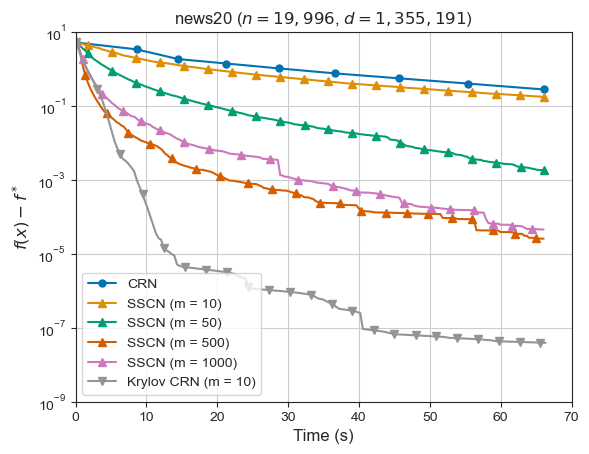

In [59]:
import seaborn as sns 

sns.set_style('ticks') # setting style
# sns.set_context('paper') # setting context
sns.set_palette('colorblind') # setting palette

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

flag_time = True
# plt.style.use('seaborn-v0_8-colorblind')

color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

f_opt = min(loss.f_opt, loss_csc.f_opt)

cub_root.trace.plot_losses(marker='o', markersize=5, f_opt=f_opt, time=flag_time, label='CRN')

sscn.trace.plot_losses(marker='^', markersize=6, f_opt=f_opt, time=flag_time)
sscn50.trace.plot_losses(marker='^', markersize=6, f_opt=f_opt, time=flag_time)

# sscn100.trace.plot_losses(marker='^', markersize=6, f_opt=f_opt, time=flag_time)
sscn500.trace.plot_losses(marker='^', markersize=6, f_opt=f_opt, time=flag_time)
sscn1000.trace.plot_losses(marker='^', markersize=6, f_opt=f_opt, time=flag_time)
# sscn5000.trace.plot_losses(marker='^', time=flag_time)

cub_krylov.trace.plot_losses(marker='v', markersize=6, f_opt=f_opt, color = color_cycle[7], time=flag_time, label='Krylov CRN (m = 10)')


# cub_root.trace.plot_losses(marker='*', label='cubic Newton (exact)')
# plt.xscale('log')
# print(cub.trace.loss_vals)
plt.yscale('log')
plt.ylim(1e-9,10)
plt.xlim(0,70)
plt.legend()
plt.grid()
plt.xlabel('Time (s)')
plt.title('news20 ($n=19, 996$, $d=1,355,191$)')
plt.savefig('figs/intro_{}.pdf'.format(dataset))
plt.show()


In [17]:
from optimizer.cubic import Optimizer, Lanczos, cubic_solver_root
from scipy.linalg import eigh

class Cubic_Krylov_LS_test(Optimizer):
    """
    Krylov subspace cubic Newton method with line search
    
    Arguments:
        
    """
    def __init__(self, reg_coef=None, subspace_dim=100, solver_eps=1e-8, beta=0.5, *args, **kwargs):
        super(Cubic_Krylov_LS_test, self).__init__(*args, **kwargs)    
        self.solver_it = 0
        self.subspace_dim = subspace_dim
        self.solver_eps = solver_eps

        self.beta = beta
        self.r0 = 0.1
        # self.residuals = []
        self.value = None

        if reg_coef is None:
            self.reg_coef = self.loss.hessian_lipschitz
        else:
            self.reg_coef = reg_coef
        
        # if cubic_solver == "GD": 
        #     self.cubic_solver = ls_cubic_solver
        # elif cubic_solver == "root":
        #     self.cubic_solver = cubic_solver_root
        # elif cubic_solver == "krylov":
        #     self.cubic_solver = cubic_solver_krylov
        # else:
        #     print("Error: cubic_solver not recognized")

        # if cubic_solver is None:
        #     # self.cubic_solver = ls_cubic_solver
        #     self.cubic_solver = cubic_solver_root
        self.spectra = []
        self.rho = []

    def step(self):
        
        if self.value is None:
            self.value = self.loss.value(self.x)
        
        
        self.grad = self.loss.gradient(self.x)


        self.hess = self.loss.hessian(self.x)
        h_eigs = eigh(self.hess, eigvals_only=True)
        self.spectra.append(h_eigs)

        # if self.cubic_solver is cubic_solver_krylov:    
        self.hess = lambda v: self.loss.hess_vec_prod(self.x,v)
            # krylov_start = time.time()
        V, alphas, betas, beta = Lanczos(self.hess, self.grad, m=self.subspace_dim)
            # krylov_end = time.time()
            # print('Krylov Time {time:.3f}'.format(time=krylov_end - krylov_start))
        self.hess = np.diag(alphas) + np.diag(betas, -1) + np.diag(betas, 1)

        np.append(betas,beta)
        self.rho.append(np.exp(np.log(betas).mean()))

        e1 = np.zeros(len(alphas))
        e1[0] = 1
        self.grad = np.linalg.norm(self.grad)*e1

        if np.linalg.norm(self.grad) < self.tolerance:
            return
        # set the initial value of the regularization coefficient
        reg_coef = self.reg_coef*self.beta

        # LS_start = time.time()

        s_new, solver_it, r0_new, model_decrease = cubic_solver_root(self.grad, self.hess, 
        reg_coef, epsilon = self.solver_eps, r0 = self.r0)
        x_new = self.x + V @ s_new
        value_new = self.loss.value(x_new)
        while value_new > self.value - model_decrease:
            reg_coef = reg_coef/self.beta
            s_new, solver_it, r0_new, model_decrease = cubic_solver_root(self.grad, self.hess, 
            reg_coef, epsilon = self.solver_eps, r0 = self.r0)
            x_new = self.x + V @ s_new
            value_new = self.loss.value(x_new)
        self.x = x_new
        self.reg_coef = reg_coef
        self.value = value_new
        self.r0 = r0_new
        
        self.solver_it += solver_it

        # if model_decrease < 1e-6:
        #     self.subspace_dim = 1
        # self.residuals.append(residual)
        # LS_end = time.time()
        # print('LS Time {time:.3f}'.format(time=LS_end - LS_start))
        
    def init_run(self, *args, **kwargs):
        super(Cubic_Krylov_LS_test, self).init_run(*args, **kwargs)
        self.trace.solver_its = [0]
        
    def update_trace(self):
        super(Cubic_Krylov_LS_test, self).update_trace()
        self.trace.solver_its.append(self.solver_it)

In [18]:
memory_size = 20
cub_krylov_test = Cubic_Krylov_LS_test(loss=loss, label='Cubic Newton LS (Krylov dim = {})'.format(memory_size),
                               subspace_dim=memory_size, tolerance = 1e-9)

In [19]:
print(f'Running optimizer: {cub_krylov_test.label}')
cub_krylov_test.run(x0=x0, it_max=100)
# cub_krylov.compute_loss_of_iterates()

Running optimizer: Cubic Newton LS (Krylov dim = 20)


100%|██████████| 100/100 [00:49<00:00,  2.04it/s]


In [20]:
spectra = np.array(cub_krylov_test.spectra)

In [21]:
spectra.shape

(100, 300)

In [22]:
rho = np.array(cub_krylov_test.rho)

In [23]:
rho

array([0.001239  , 0.00194922, 0.00409076, 0.01104123, 0.0107037 ,
       0.00891361, 0.00571905, 0.00287244, 0.00185447, 0.00140831,
       0.00115378, 0.00111366, 0.00101151, 0.0009546 , 0.00087281,
       0.00079056, 0.00072923, 0.00067624, 0.00065605, 0.00062792,
       0.00063189, 0.00060636, 0.00058143, 0.00057276, 0.00057249,
       0.00056069, 0.00055336, 0.00055532, 0.00057007, 0.00055101,
       0.00055354, 0.00055321, 0.00055746, 0.00057601, 0.00054526,
       0.00056541, 0.00057266, 0.0005681 , 0.00057051, 0.00056549,
       0.00056742, 0.00056399, 0.00056658, 0.00055858, 0.00056506,
       0.0005578 , 0.00056391, 0.00055714, 0.0005483 , 0.00054009,
       0.00055986, 0.00054736, 0.00055807, 0.00053485, 0.00054265,
       0.00054905, 0.00051563, 0.00053841, 0.00055495, 0.00055263,
       0.00056756, 0.00056355, 0.00055948, 0.00054682, 0.00057137,
       0.00053956, 0.00055966, 0.00055749, 0.00056325, 0.00056747,
       0.00057759, 0.00056619, 0.00057714, 0.00056437, 0.00057

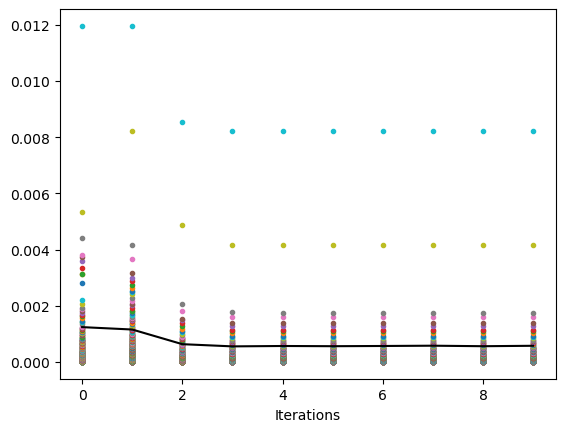

In [31]:
import matplotlib.pyplot as plt
for i in range(spectra.shape[1]):
    plt.plot(spectra[0:-1:10,i],'.')

# plt.figure()
# plt.semilogy(spectra[:,-memory_size], '.')
plt.xlabel('Iterations')
plt.
plt.plot(rho[0:-1:10],'k')
plt.show()

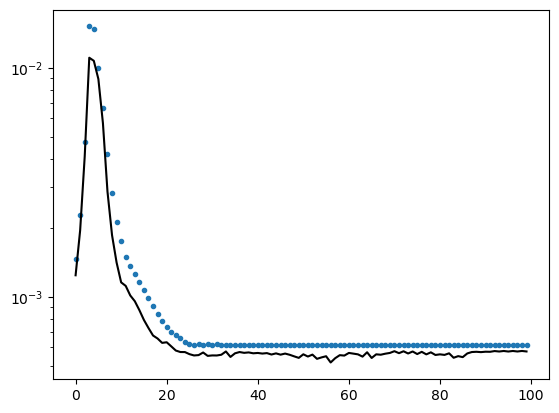

In [30]:
import matplotlib.pyplot as plt
# for i in range(spectra.shape[1]):
# plt.plot(spectra[:,memory_size],'.')

plt.figure()
plt.semilogy(spectra[:,-memory_size], '.')
plt.plot(rho,'k')
plt.show()